Hello everyone this is Task 1 - Prediction using Supervised ML (To be able to predict the percentage of a student based upon the no. of study hours)

Libraries/Datasets Used: Scikit Learn, Pandas, Numpy, Iris Dataset

Task completed for the role of Data Science & Business Analytics Internship @ The Sparks Foundation By- Mohammad Habeebulla Arshad

In [3]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [4]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#to find no. of coloums and rows
df.shape

(25, 2)

In [7]:
#to know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#to check if the given dataset is havinf missing values or null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

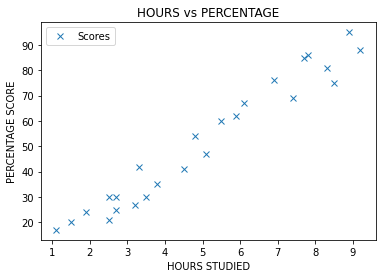

In [10]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='x')  
plt.title('HOURS vs PERCENTAGE')  
plt.xlabel('HOURS STUDIED')  
plt.ylabel('PERCENTAGE SCORE')  
plt.show()

In [11]:
#Determine the correlation between variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [12]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [16]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

Step 4 Training the Algorithm After splitting our data into training and testing sets, now we are suppose to train our algorithm.

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


Step 5 Visualizing the model After training our algorithm we visualize it.

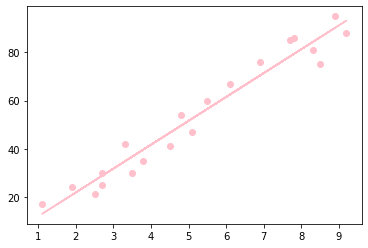

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, Y_train, color="Pink")
plt.plot(X, line, color="Pink");
plt.show()

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
ho = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
ho

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
Y_test

array([20, 27, 69, 30, 62])

In [23]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [28]:
#testing our own data
hours = 9.57
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.57
Predicted Score = 96.8631425611809


Therefore the predicted score if a person studies for 9.57 hrs is 96.8631425611809

Step 7 Evaluating the model The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002982
